In [1]:
import pennylane as qml
from pennylane import numpy as np
import qiskit
from qiskit import QuantumCircuit
import sys
import os
sys.path.append('..')
from q_alchemy.qiskit import QAlchemyInitialize
from q_alchemy.qiskit_to_pennylane import convert_qiskit

os.environ["Q_ALCHEMY_API_KEY"] = "n6I5ypSXJeb8E1mlX71gAJ1v9RCKSb52"


# Introduction

Here, we illustrate how the qiskit quantum circuit generated by Q-alchemy can be converted into pennylane circuits using qiskit_to_pennylane module. 
We will first demonstrate the transformation process with a simple 2 qubit circuit.

In [2]:
dev = qml.device('default.qubit', wires=3)

@qml.qnode(dev)
def circuit(state):
    qml.MottonenStatePreparation(state_vector=state, wires=range(3))
    inst = qml.MottonenStatePreparation.compute_decomposition(state, wires=range(3))
    print(inst[0])
    return qml.state()

state = np.array([1, 2j, 3, 4j, 5, 6j, 7, 8j])
state = state / np.linalg.norm(state)

print(qml.draw(circuit, expansion_strategy="device", max_length=80)(state))

RY(tensor(2.35446438, requires_grad=True), wires=[0])
0: ──RY(2.35)─╭●───────────╭●──────────────╭●────────────────────────╭●
1: ──RY(2.09)─╰X──RY(0.21)─╰X─╭●───────────│────────────╭●───────────│─
2: ──RY(1.88)─────────────────╰X──RY(0.10)─╰X──RY(0.08)─╰X──RY(0.15)─╰X

──╭●────────╭●────╭●────╭●──RY(2.35)─╭●───────────╭●──────────────╭●──────────
──╰X────────╰X─╭●─│──╭●─│───RY(2.09)─╰X──RY(0.21)─╰X─╭●───────────│───────────
───RZ(1.57)────╰X─╰X─╰X─╰X──RY(1.88)─────────────────╰X──RY(0.10)─╰X──RY(0.08)

───────────────╭●─╭●────────╭●────╭●────╭●─┤ ╭State
──╭●───────────│──╰X────────╰X─╭●─│──╭●─│──┤ ├State
──╰X──RY(0.15)─╰X──RZ(1.57)────╰X─╰X─╰X─╰X─┤ ╰State


In [3]:
dev = qml.device('default.qubit', wires=3)

@qml.qnode(dev)
def circuit(state):
    convert_qiskit(state_vector=state, wires=range(3))
    return qml.state()

state = np.array([1, 2j, 3, 4j, 5, 6j, 7, 8j])
state = state / np.linalg.norm(state)

print(qml.draw(circuit, expansion_strategy="device", max_length=80)(state))

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.01001 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.03982 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: HighLevelSynthesis - 0.00787 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00906 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 1.34087 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: HighLevelSynthesis - 0.00501 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.03600 (ms)
INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {('u', 1)} to target basis {'cx', 'u', 'reset', 'barrier', 'snapshot', 'qsd2q', 'measure', 'delay'}.
INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.
INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation pa

[]
[RY(1.7488892650260939, wires=[0])]
[RY(1.7488892650260939, wires=[0]), RZ(-4.71238898038469, wires=[0])]
[RY(1.7488892650260939, wires=[0]), RZ(-4.71238898038469, wires=[0]), RY(0.1565613432793138, wires=[1])]
[RY(1.7488892650260939, wires=[0]), RZ(-4.71238898038469, wires=[0]), RY(0.1565613432793138, wires=[1]), CNOT(wires=[1, 2])]
[RY(1.7488892650260939, wires=[0]), RZ(-4.71238898038469, wires=[0]), RY(0.1565613432793138, wires=[1]), CNOT(wires=[1, 2]), RY(-2.370839454730209, wires=[2])]
[RY(1.7488892650260939, wires=[0]), RZ(-4.71238898038469, wires=[0]), RY(0.1565613432793138, wires=[1]), CNOT(wires=[1, 2]), RY(-2.370839454730209, wires=[2]), RZ(-3.141592653589793, wires=[2])]
0: ──RY(1.75)──RZ(-4.71)───────────────────────┤ ╭State
1: ──RY(0.16)─╭●──────────RY(1.94)─────────────┤ ├State
2: ───────────╰X──────────RY(-2.37)──RZ(-3.14)─┤ ╰State


In [4]:
import numpy as np

state = np.array([1, 2j, 3, 4j, 5, 6j, 7, 8j])
state = state / np.linalg.norm(state)

from qiskit import transpile

def preparation_circuit(X):
    sp_org = QAlchemyInitialize(X, opt_params={'max_fidelity_loss':0.0})
    qc_final = QuantumCircuit(sp_org.definition.num_qubits, name="preparation")
    qc = transpile(sp_org.definition, basis_gates=["id", "rx", "ry", "rz", "cx"])
    return qc

qc = preparation_circuit(state)

qc.draw()


INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00834 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.02980 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: HighLevelSynthesis - 0.06604 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00691 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.20504 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: HighLevelSynthesis - 0.01407 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.00787 (ms)
INFO:qiskit.transpiler.passes.basis.basis_translator:Begin BasisTranslator from source basis {('u', 1)} to target basis {'cx', 'u', 'reset', 'barrier', 'snapshot', 'qsd2q', 'measure', 'delay'}.
INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation path search completed in 0.000s.
INFO:qiskit.transpiler.passes.basis.basis_translator:Basis translation paths composed in 0.001s.
INFO:qiskit.transpiler.passe

global phase: 3π/4
      ┌────────────┐┌───────────┐                         
q_0: ─┤ Ry(1.7489) ├┤ Rz(-3π/2) ├─────────────────────────
     ┌┴────────────┤└───────────┘ ┌────────────┐          
q_1: ┤ Ry(0.15656) ├──────■───────┤ Ry(1.9377) ├──────────
     └─────────────┘    ┌─┴─┐    ┌┴────────────┤┌────────┐
q_2: ───────────────────┤ X ├────┤ Ry(-2.3708) ├┤ Rz(-π) ├
                        └───┘    └─────────────┘└────────┘

In [5]:
qc = QuantumCircuit(2,2)
qc.rz(np.pi/4, 0)
qc.cx(0, 1)
qc.ry(0.7, 1)
qc.draw()
print(qc.data)
print(qc.num_qubits)

[CircuitInstruction(operation=Instruction(name='rz', num_qubits=1, num_clbits=0, params=[0.7853981633974483]), qubits=(Qubit(QuantumRegister(2, 'q'), 0),), clbits=()), CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)), clbits=()), CircuitInstruction(operation=Instruction(name='ry', num_qubits=1, num_clbits=0, params=[0.7]), qubits=(Qubit(QuantumRegister(2, 'q'), 1),), clbits=())]
2


## Illustration on mnist data

In [7]:
import tensorflow as tf
import numpy as np
def load_minist01():
    classes = [0, 1]
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    
    x_train, x_test = x_train[..., np.newaxis] / 255.0, x_test[..., np.newaxis] / 255.0
    
    x_train_filter_01 = np.where((y_train == classes[0]) | (y_train == classes[1]))
    x_test_filter_01 = np.where((y_test == classes[0]) | (y_test == classes[1]))

    X_train, X_test = x_train[x_train_filter_01], x_test[x_test_filter_01]
    Y_train, Y_test = y_train[x_train_filter_01], y_test[x_test_filter_01]
    
    Y_train = [1 if y == classes[0] else -1 for y in Y_train]
    Y_test = [1 if y == classes[0] else -1 for y in Y_test]
    
    X_train = tf.image.resize(X_train[:], (256, 1)).numpy()
    X_test = tf.image.resize(X_test[:], (256, 1)).numpy()
    X_train, X_test = tf.squeeze(X_train).numpy(), tf.squeeze(X_test).numpy()
    
    X_train_norms, X_test_norms = np.linalg.norm(X_train, axis=1), np.linalg.norm(X_test, axis=1)
    X_train_norms, X_test_norms = X_train_norms[:, np.newaxis], X_test_norms[:, np.newaxis]
    
    X_train, X_test = X_train/X_train_norms, X_test/X_test_norms
    
    return X_train, X_test, Y_train, Y_test

In [8]:
from qiskit import transpile

def preparation_circuit(X):
    sp_org = QAlchemyInitialize(X, opt_params={'max_fidelity_loss':0.0})
    qc_final = QuantumCircuit(sp_org.definition.num_qubits, name="preparation")
    qc = transpile(sp_org.definition, basis_gates=["id", "rx", "ry", "rz", "cx"])
    return qc

In [ ]:
X_train, X_test, y_train, y_test = load_minist01()

qc = preparation_circuit(X_train[0])

INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00620 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 0.06104 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: HighLevelSynthesis - 0.00715 (ms)
/Users/wooseophwang/anaconda3/envs/new/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/wooseophwang/anaconda3/envs/new/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
INFO:qiskit.transpiler.runningpassmanager:Pass: ContainsInstruction - 0.00501 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: UnitarySynthesis - 2.65694 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: HighLevelSynthesis - 0.00691 (ms)
INFO:qiskit.transpiler.runningpassmanager:Pass: UnrollCustomDefinitions - 0.04005 (ms)
INFO:qiskit.transpiler.passes.basi

In [ ]:
dev = qml.device('default.qubit', wires=8)

@qml.qnode(dev)
def circuit(state):
    convert_qiskit(state_vector=state, wires=range(3))
    return qml.state()

state = X_train[0]
state = state / np.linalg.norm(state)

print(qml.draw(circuit, expansion_strategy="device", max_length=80)(state))

0: ──RY(0.01)──╭●─────────RY(-0.57)──RZ(-3.14)─╭●──RZ(0.75)──╭●──────────────────────────────────
1: ────────────╰X─────────RY(-0.11)──RZ(-3.14)─│─────────────│─────────────────────────────────╭●
2: ──RZ(-1.39)──RY(0.72)──RZ(-0.38)────────────│─────────────│─────────────────────────────────│─
3: ──RZ(-1.55)──RY(1.66)──RZ(0.52)─────────────│─────────────╰X──RZ(-2.09)──RY(1.59)──RZ(1.66)─│─
4: ────────────────────────────────────────────╰X──RZ(-1.95)───────────────────────────────────│─
5: ────────────────────────────────────────────────────────────────────────────────────────────╰X
6: ──RZ(-1.57)──RY(1.61)──RZ(-0.03)──────────────────────────────────────────────────────────────
7: ──RZ(-1.55)──RY(1.41)──RZ(-0.29)──────────────────────────────────────────────────────────────

───────────────────────────────────────────────────────╭●──────────────────────────────────────
───RZ(-1.04)─╭●────────────────────────────────────────│───────────────────────────────────────
─────────────│─────────

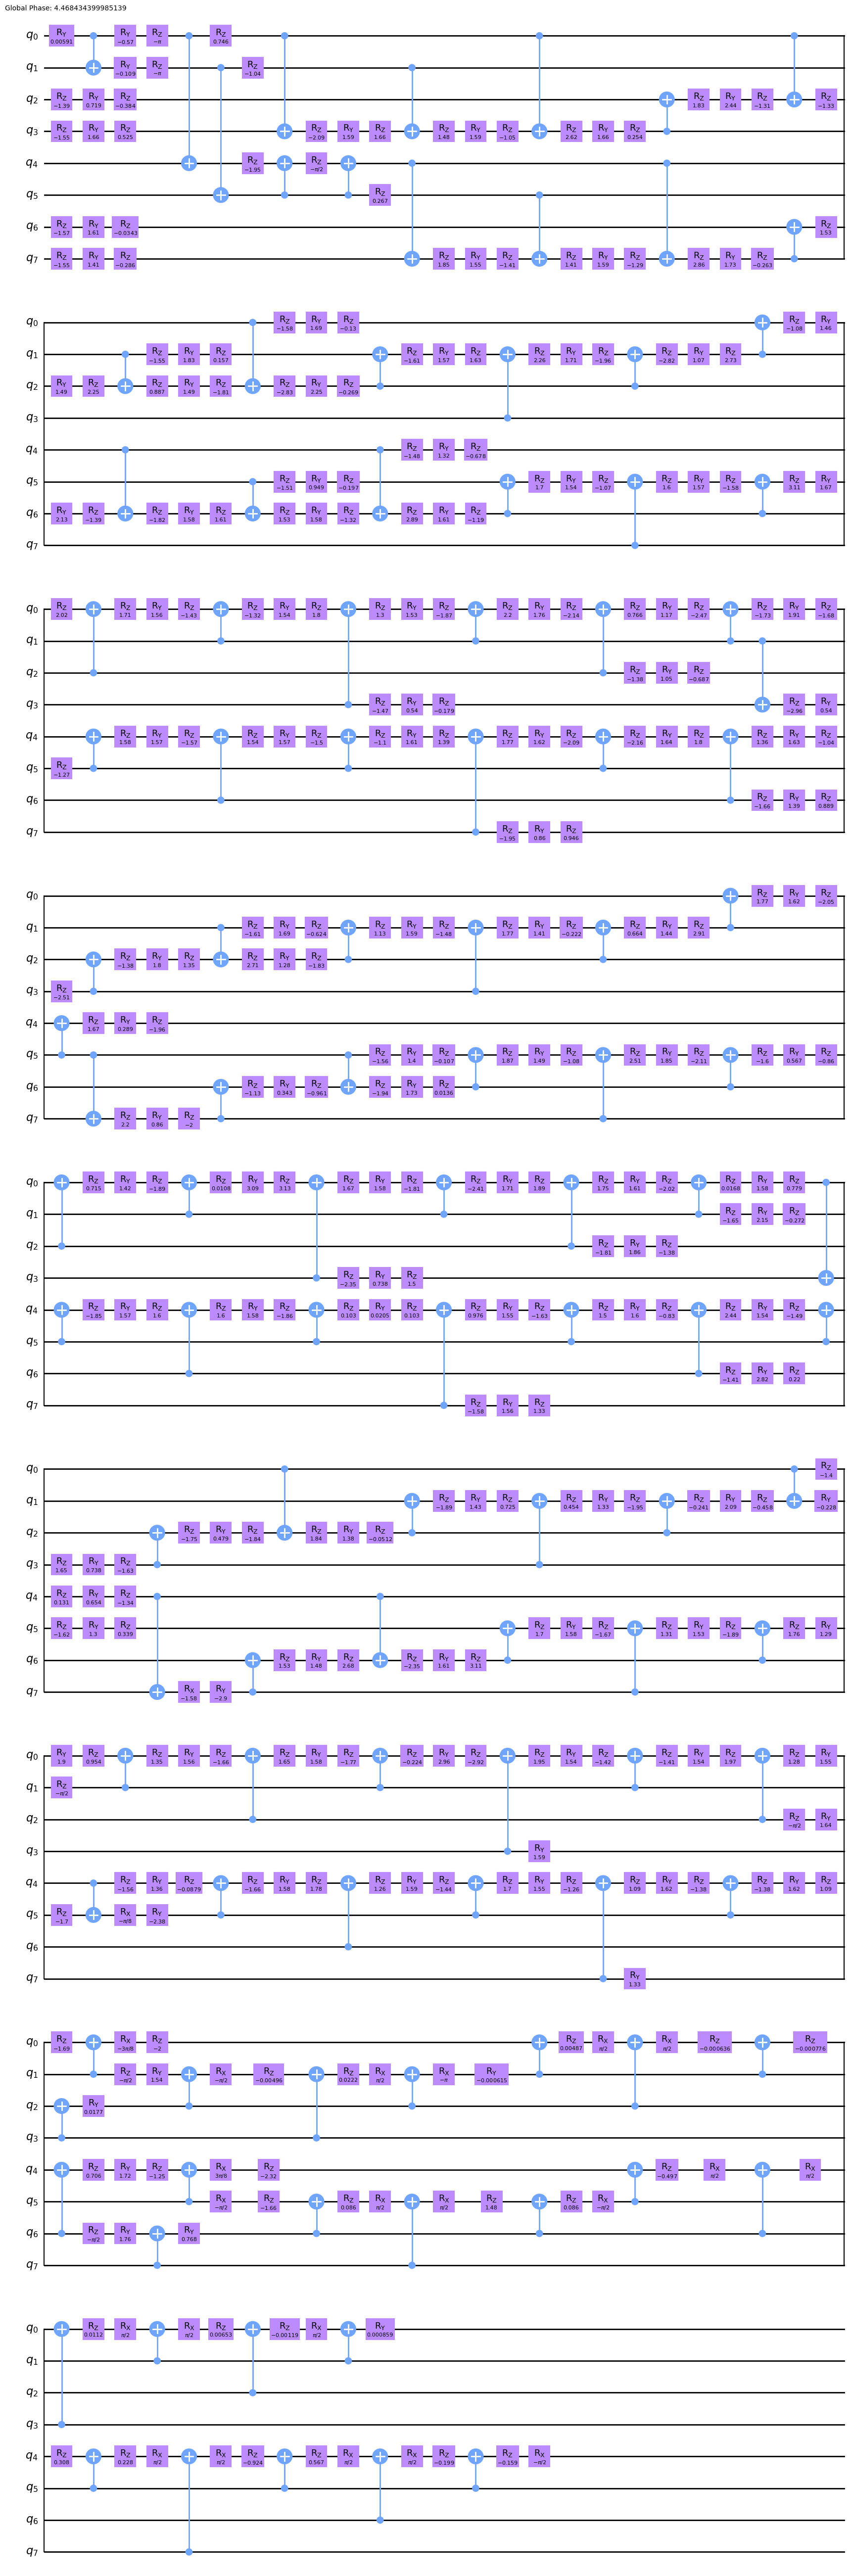

In [ ]:
qc.draw('mpl')